<a href="https://colab.research.google.com/github/Roxana2125128/Inteligencia-Artificial/blob/main/Practica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 2.- Procesamiento geométrico y procesamiento de histograma**

*LABORATORIO PDI*


Alumnos:

Roxana Pamela Martínez Córdova 2125128

Ramiro Gracia Díaz 2010673

**Parte I.- Procesamiento geométrico**

*A) Ejercicio 1: Traslación*

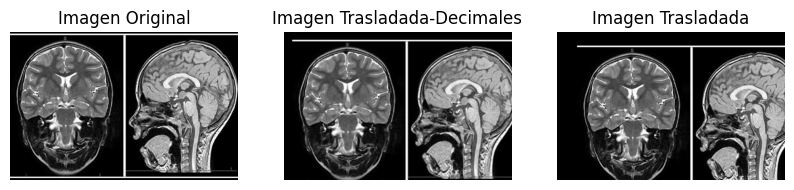

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
imagen = cv2.imread("resonancia3.jpg", cv2.IMREAD_GRAYSCALE)
# Dimensiones de la imagen
alto, ancho = imagen.shape

# Definir la matriz de traslación (Mueve la imagen 50px en eje X y 30px en eje Y)
tx, ty = 50, 30  # Desplazamiento en X e Y
M = np.float32([[1, 0, tx], [0, 1, ty]])
# Aplicar la transformación afín
imagen_trasladada = cv2.warpAffine(imagen, M, (ancho, alto))

# Definir la matriz de traslación con valores (20.5 en eje X y 15.5 en eje Y)
tx, ty = 20.5, 15.5  # Desplazamiento en X e Y con decimales
M = np.float32([[1, 0, tx], [0, 1, ty]])
# Aplicar la traslación con interpolación
imagen_trasladada_decimales = cv2.warpAffine(imagen, M, (ancho, alto), flags=cv2.INTER_LINEAR)

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(imagen_trasladada_decimales, cmap="gray")
plt.title("Imagen Trasladada-Decimales")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(imagen_trasladada, cmap="gray")
plt.title("Imagen Trasladada")
plt.axis("off")

plt.show()

*B) Ejercicio 2: Rotación*

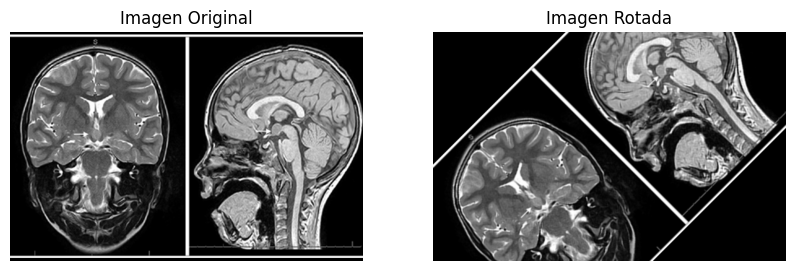

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
imagen = cv2.imread("resonancia3.jpg", cv2.IMREAD_GRAYSCALE)
# Dimensiones de la imagen
alto, ancho = imagen.shape

# Definir rotación (45° centro de la imagen)
angulo = 45
M_rotacion = cv2.getRotationMatrix2D(centro, angulo, 1)
# Aplicar rotación sobre la imagen trasladada
imagen_final = cv2.warpAffine(imagen, M_rotacion, (ancho, alto))

# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imagen_final, cmap="gray")
plt.title("Imagen Rotada")
plt.axis("off")

plt.show()

*C) Ejercicio 3: Escala*

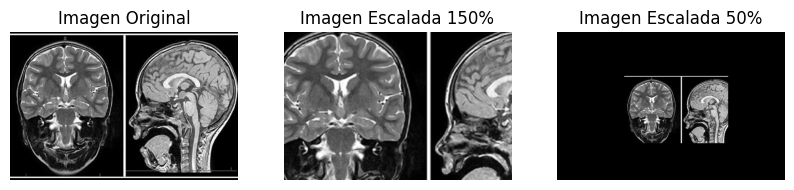

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
imagen = cv2.imread("resonancia3.jpg", cv2.IMREAD_GRAYSCALE)
# Dimensiones de la imagen
alto, ancho = imagen.shape

# Definir escalado
escala1 = 1.5
escala2 = 0.5
centro = (ancho // 2, alto // 2)  # Centro de la imagen

M_escala150 = cv2.getRotationMatrix2D(centro, 0, escala1)
M_escala50 = cv2.getRotationMatrix2D(centro, 0, escala2)

# Aplicar rotación y escalado
imagen_escalada150 = cv2.warpAffine(imagen_trasladada, M_escala150, (ancho, alto))
imagen_escalada50 = cv2.warpAffine(imagen_trasladada, M_escala50, (ancho, alto))


#Mostrar Imagenenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(imagen_escalada150, cmap="gray")
plt.title("Imagen Escalada 150%")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(imagen_escalada50, cmap="gray")
plt.title("Imagen Escalada 50%")
plt.axis("off")

plt.show()

**Parte II.- Ecualización de histograma**

*A) Ejercicio 1: Ecualización*

1. Cargar una imagen médica con bajo contraste

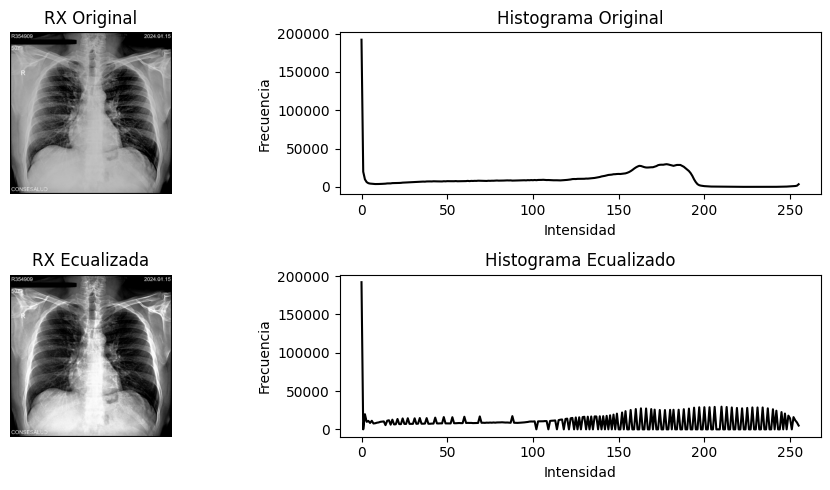

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
imagen = cv2.imread("rxtorax3.jpg", cv2.IMREAD_GRAYSCALE)
# Aplicar ecualización de histograma
imagen_ecualizada = cv2.equalizeHist(imagen)
# Calcular histogramas antes y después
hist_original = cv2.calcHist([imagen], [0], None, [256], [0,256])
hist_ecualizada = cv2.calcHist([imagen_ecualizada], [0], None, [256], [0,256])
# Mostrar imágenes y histogramas
plt.figure(figsize=(10,5))

# Imagen Original
plt.subplot(2,2,1)
plt.imshow(imagen, cmap="gray")
plt.title("RX Original")
plt.axis("off")

# Histograma Original
plt.subplot(2,2,2)
plt.plot(hist_original, color="black")
plt.title("Histograma Original")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

# Imagen Ecualizada
plt.subplot(2,2,3)
plt.imshow(imagen_ecualizada, cmap="gray")
plt.title("RX Ecualizada")
plt.axis("off")

# Histograma Ecualizado
plt.subplot(2,2,4)
plt.plot(hist_ecualizada, color="black")
plt.title("Histograma Ecualizado")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()